#Mobile Price Dataset
## V√µ Th√†nh Ho√†ng S∆°n - 19DH110660



#LAB1 - Dataset(Mobile Price Dataset)
-  Source: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
- Name: Mobile Price Classification
- Context:
  - Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
  - He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

  - Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

- Problem: In this problem you do not have to predict actual price but a price range indicating how high the price is



## 1.1 Load dataset
- Dataset ulr: 1AvhQXsYbaLg9ZLGWhZir1C9lYQJgZg_D
- Folder tree:
  - Mobile Price Dataset
    + test.csv
    + train.csv
    

In [ ]:
url = 'https://drive.google.com/drive/folders/1AvhQXsYbaLg9ZLGWhZir1C9lYQJgZg_D?usp=sharing'
import gdown
gdown.download_folder(url)

Retrieving folder list


Processing file 1_fWtViL-QZf5zsQx4MW44VUiaHmjOMOl test.csv
Processing file 1ASxEE4V7gnixpe6RMTVSXBZMni1L--Vu train.csv
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1_fWtViL-QZf5zsQx4MW44VUiaHmjOMOl
To: /content/mobile_price_dataset/test.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63.9k/63.9k [00:00<00:00, 30.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ASxEE4V7gnixpe6RMTVSXBZMni1L--Vu
To: /content/mobile_price_dataset/train.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 122k/122k [00:00<00:00, 27.5MB/s]
Download completed


['/content/mobile_price_dataset/test.csv',
 '/content/mobile_price_dataset/train.csv']

## 1.2 Import library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
train = pd.read_csv('mobile_price_dataset/train.csv')
test = pd.read_csv('mobile_price_dataset/test.csv')

In [ ]:
train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [ ]:
test = test.drop(['id'],axis=1)
test.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  16        226      1412  3476    12     7          2   
1        191        5  12        746       857  3895     6     0          7   
2        186        3   4       1270      1366  2396    17    10         10   
3         96        8  20        295      1752  3893    10     0          7   
4        108        6  18        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  
0        0             1     0  
1        1             0     0  
2        0             1     1  
3        1             1     0  
4        1             0     1

**Nh·∫≠n x√©t:** Sau khi hi·ªÉn th·ªã 5 d√≤ng ƒë·∫ßu c·ªßa 2 t·∫≠p d·ªØ li·ªáu
  - T·∫≠p test c√≥ th√™m c·ªôt id khi·∫øn c√°c c·ªôt kh√¥ng ƒë·ªìng ƒë·ªÅu.
  
**Ph∆∞∆°ng ph√°p:**
  - X√≥a c·ªôt id t·∫°i test dataset (ƒë·ªÉ c√°c c·ªôt ƒë·ªìng nh·∫•t gi·ªØa 2 dataset)

## 1.3 Explain dataset


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

**Nh·∫≠n x√©t:**
  - Dataset c√≥ 19 features v√† m·ªôt outcome
  - Dataset 2000 m·∫´u
  - Kh√¥ng ch·ª©a b·∫•t k√¨ gi√° tr·ªã NaN, null
  - T·∫•t c·∫£ ƒëi·ªÅu l√† ki·ªÉu d·ªØ li·ªáu s·ªë: (int64, float64) c·∫ßn ph·∫£i ph√¢n lo·∫°i d·ªØ li·ªáu

**Ph√¢n lo·∫°i c√°c features**
- Numerical: battery_power, clock_speed,pc ,int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time.
- Categorical: blue, dual_sim, four_g, three_g, wifi, price_range, touch_screen




### Transform to categorical

In [ ]:
categorical = ['blue', 'dual_sim', 'four_g', 'three_g','touch_screen', 'wifi']
numerical = [ 'battery_power', 'clock_speed','pc' ,'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 
             'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

def convert_type(df,columns,astype):
    for feature in columns:
        df[feature] = df[feature].astype(astype)
        
convert_type(train,categorical,'category')
convert_type(test,categorical[:-1],'category')

In [ ]:
#Describe Numeric
train.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
clock_speed       2.20     3.0  
fc                7.00    19.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
price_range       2.25     3.0

In [ ]:
#Describe Categoric
train.describe(include=['category'])

blue  dual_sim  four_g  three_g  touch_screen  wifi
count   2000      2000    2000     2000          2000  2000
unique     2         2       2        2             2     2
top        0         1       1        1             1     1
freq    1010      1019    1043     1523          1006  1014

**Nh·∫≠n x√©t:**
  - Gi√° tr·ªã min, max, std gi·ªØa c√°c features ki·ªÉu numeric kh√¥ng ƒë·ªìng ƒëi·ªÅu
  - C√°c fetures ki·ªÉu category ƒëi·ªÅu c√≥ 2 lo·∫°, s·ªë l∆∞∆°ng m·ªói lo·∫°i c·ªßa t·ª´ng features kh√° t∆∞∆°ng ƒë·ªìng (kho·∫£ng 1010) ngo·∫°i tr·ª´ three_g

**Ph∆∞∆°ng ph√°p:**
  - C·∫ßn **Chu·∫©n ho√° d·ªØ li·ªáu**

## 1.4 Visualize data

In [ ]:
sns.set()
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


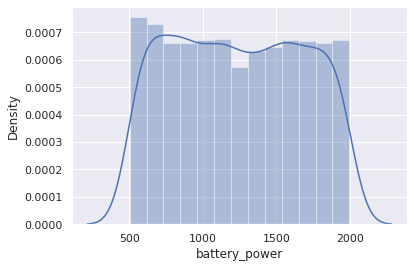

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


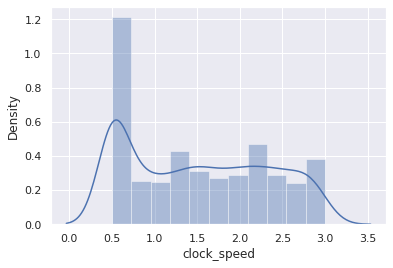

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


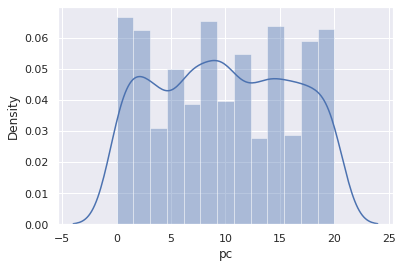

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


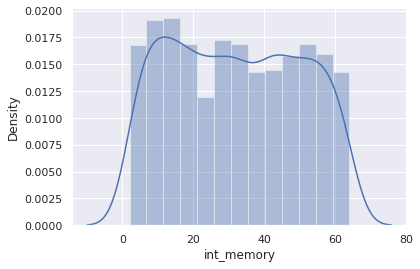

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


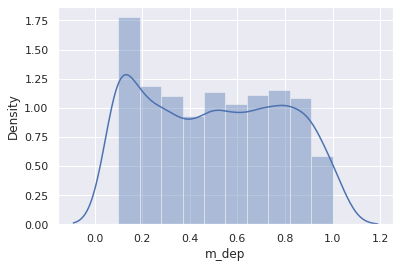

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


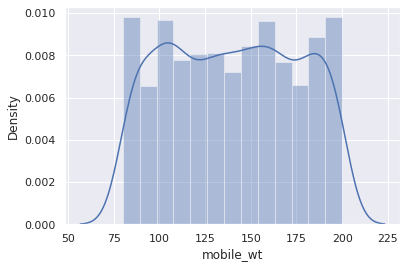

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


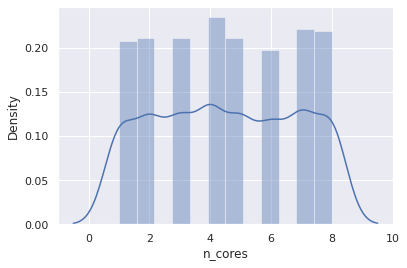

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


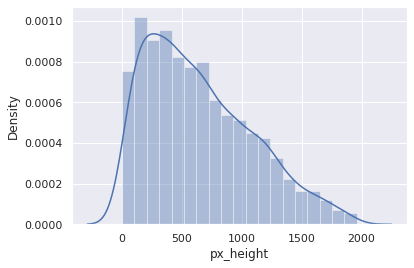

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


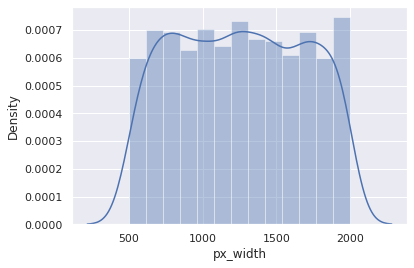

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


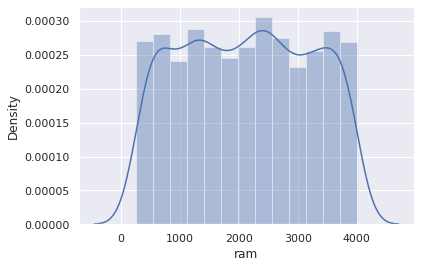

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


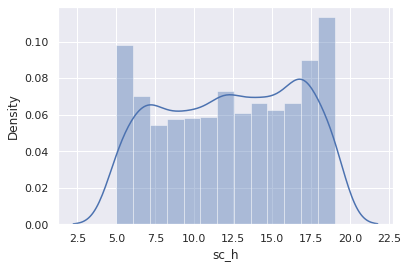

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


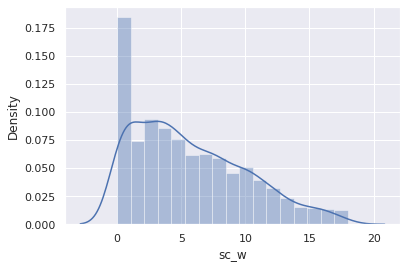

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


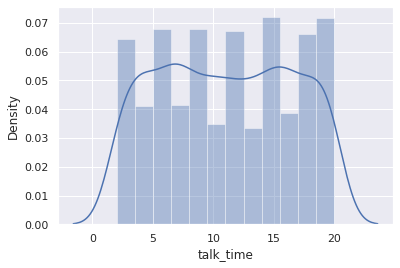

In [ ]:
for i in numerical:
  sns.distplot(train[i])
  plt.show()

**C√°c d·∫°ng ph√¢n ph·ªëi:** C√°c features ƒë∆∞·ª£c hi·ªÉn th·ªã d∆∞·ªõi 2 ki·ªÉu ph√¢n ph·ªëi: Posion, Ph√¢n ph·ªëi ƒë·ªÅu
- Posion: px_height, sc_w
- Ph√¢n ph·ªëi ƒë·ªÅu: c√°c features c√≤n l·∫°i

### 1.4.1 Correlation


In [ ]:
convert_type(train,['price_range'],'int64')

Text(0.5, 1.0, 'Correlation ')

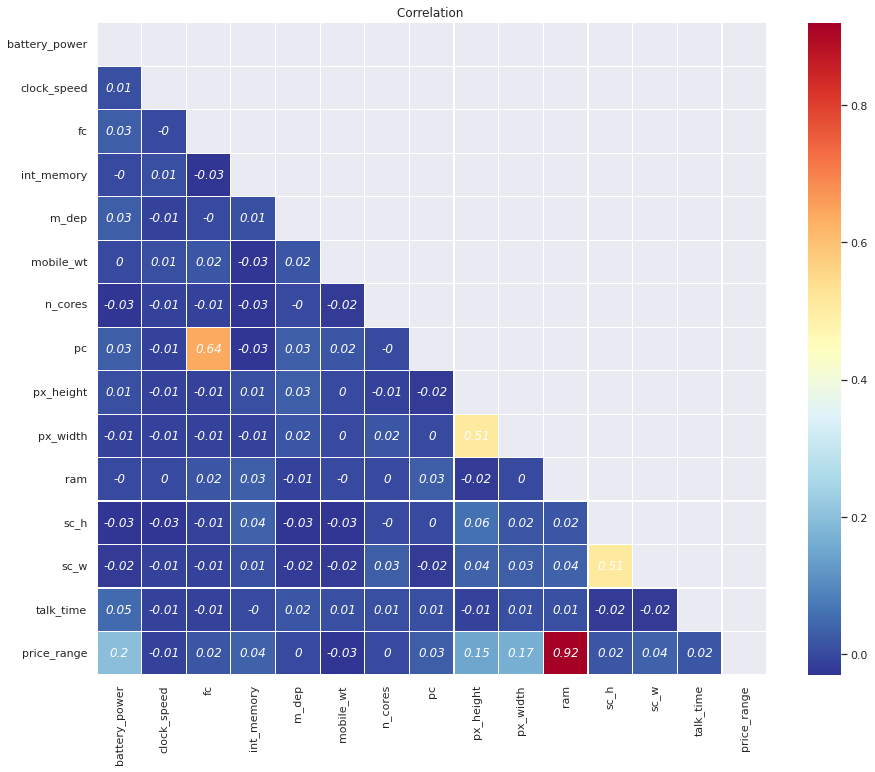

In [ ]:
corr=train.corr().round(2)
fig = plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(corr))
# mask = mask > 0.4
r = sns.heatmap(corr,
                cmap="RdYlBu_r",
                annot=True,
                annot_kws = {'fontsize':12, 
                             'fontstyle':'italic', 
                             'color':'w',
                             'verticalalignment':'center'},
                mask=mask,
                linewidth =.2)
r.set_title("Correlation ")

**Nh·∫≠n x√©t:**
-  ƒê·ªô t∆∞∆°ng qua gi·ªØa Ram v√† m·ª©c gi√° l√† r·∫•t l·ªõn (0.92) 

**Ph∆∞∆°ng ph√°p:**
- Ram l√† tham chi·∫øu ƒë·ªÉ Visualize v·ªõi c√°c ƒë·∫∑c tr∆∞ng kh√°c.

In [ ]:
convert_type(train,['price_range'],'category')

### 1.4.2 Some plot

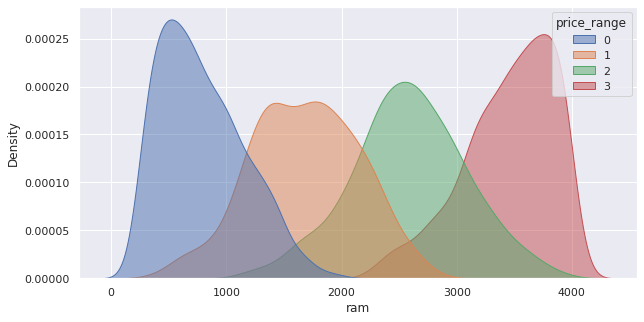

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(data= train, x='ram', hue='price_range',fill=True,alpha=.5, linewidth=1)

Text(0.5, 1.0, 'Battery and Ram follows Price')

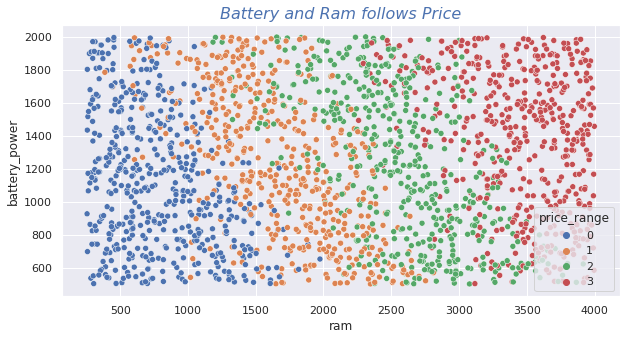

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= train, x= 'ram', y= 'battery_power', hue='price_range')
plt.title("Battery and Ram follows Price",c='b',style="oblique",size=16)

Text(0.5, 1.0, 'Primary Cam and Ram follows Price')

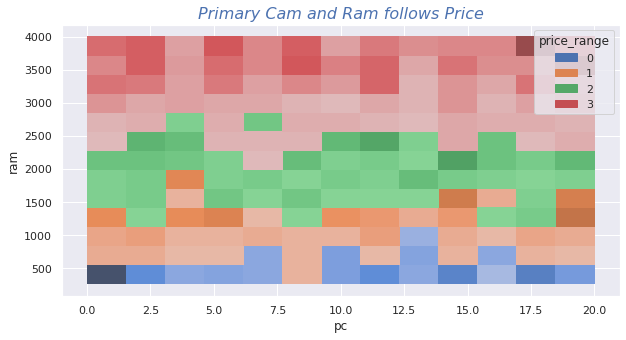

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data= train, x= 'pc', y= 'ram', hue='price_range')
plt.title("Primary Cam and Ram follows Price",c='b',style="oblique",size=16)

**Nh·∫≠n x√©t:** 
- Khi hi·ªÉn th·ªã c√°c feature(battery,pc) v·ªõi c·ªôt ram cho th·∫•y c√≥ s·ª± ph√¢n l·ªõp ƒë·∫∑c bi·ªát l√† battery

- Tuy nhi√™n nh·ªØng s·ª± ph√¢n l·ªõp n√†y ch∆∞a r·ªùi r·∫°c

**Ph∆∞∆°ng ph√°p:** C√≥ th·ªÉ s·ª≠ d·ª•ng c√°c ƒë·∫∑c tr∆∞ng n√†y ƒë·ªÉ ti·∫øn h√†nh training ƒë·ªÉ ƒë·ªëi chi·∫øu k·∫øt qu·∫£ v·ªõi to√†n b·ªô datasset



## 1.5 Grid Search (T√¨m th√¥ng s·ªë t·ªëi ∆∞u)

In [ ]:
!pip install pipelinehelper -q


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold


from sklearn.preprocessing import Normalizer,StandardScaler,MaxAbsScaler,FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import sklearn


from sklearn.pipeline import Pipeline
from pipelinehelper import PipelineHelper

import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Pipeline params


params = {}
params["data_split_train"] = 0.7
params['random_state'] = 54
params['k_fold'] = 3
 


In [ ]:
pipe = Pipeline([
    ('scaler', PipelineHelper([
        ('std', StandardScaler()),
        ('normal', Normalizer()),
        ('non', FunctionTransformer())
    ])),
    ('classifier', PipelineHelper([
        ('svm', SVC()),
        ('lr', LogisticRegression()),
        ('knn', KNeighborsClassifier())

    ])),
])

# C√°c c·∫•u h√¨nh th·ª≠ nghi·ªám
parameters = {
    'scaler__selected_model': pipe.named_steps['scaler'].generate({
        'std__with_mean': [True],
        'std__with_std': [False],

        'normal__norm': ['l1','l2','max']
    }),
    'classifier__selected_model': pipe.named_steps['classifier'].generate({
        # 'svm__C': [1.0, 10.0],
        # 'svm__kernel': ['linear','poly','rbf','sigmoid'],
        # 'svm__degree': [2,3,5,6,10],


        'lr__fit_intercept': [True,False],
        'lr__solver': ['saga','liblinear','newton-cg'],
        'lr__max_iter': [500,1000],

        # 'knn__n_neighbors' : [5,10,15,20,25,30],
        # 'knn__leaf_size': [20,25,30,35,40]
      
    })
}
# L·ª±a ch·ªçn c·∫•u h√¨nh: ki·ªÉm th·ª≠ ch√©o (chia X_train th√†nh 5 ph·∫ßn)
grid = GridSearchCV(pipe, parameters, cv=params['k_fold'], scoring='accuracy',verbose=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,0:-1],
                                                    train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])

In [ ]:
#Fit and train model
grid.fit(X_train, y_train)

print("-"*80)
print("C·∫•u h√¨nh t·ªët nh·∫•t: ", grid.best_params_)
print("ƒê·ªô ch√≠nh x√°c: {:6.2f}".format(grid.score(X_test, y_test)))

Fitting 3 folds for each of 70 candidates, totalling 210 fits
--------------------------------------------------------------------------------
C·∫•u h√¨nh t·ªët nh·∫•t:  {'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 500, 'solver': 'newton-cg'}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
ƒê·ªô ch√≠nh x√°c:   0.97


## 1.6 ƒê√°nh gi√° m√¥ h√¨nh v·ªõi tham s·ªë t·ªëi ∆∞u (Th·ª±c nghi·ªám 1)

Ma tr·∫≠n nh·∫ßm l·∫´n: 
[[145   2   0   0]
 [  5 148   3   0]
 [  0   5 142   3]
 [  0   0   2 145]]


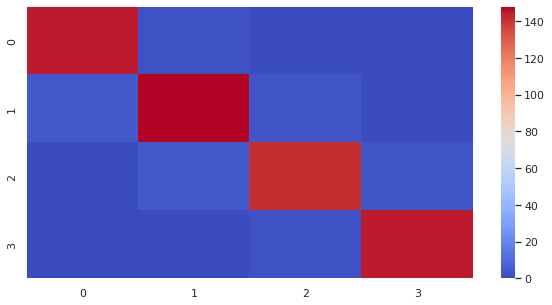

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

# D·ª± b√°o cho d·ªØ li·ªáu trong t·∫≠p "ki·ªÉm tra" 
y_pred = grid.predict(X_test)

# T√≠nh c√°c ƒë·ªô ƒëo
cmatrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cmatrix,cmap='coolwarm')

print("Ma tr·∫≠n nh·∫ßm l·∫´n: ")
print(cmatrix)

In [ ]:
# T·ªïng quan k·∫øt qu·∫£
metric_score = classification_report(y_test, y_pred)
print(metric_score)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.95      0.95      0.95       156
           2       0.97      0.95      0.96       150
           3       0.98      0.99      0.98       147

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [ ]:
from sklearn.metrics import precision_recall_fscore_support
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)

In [ ]:
# K·∫øt qu·∫£
print("ƒê·ªô ch√≠nh x√°c (precision): {:7.2f}%".format(scores[0]*100))
print("ƒê·ªô tri·ªáu h·ªìi (recall): {:7.2f}%".format(scores[1]*100))
print("ƒê·ªô ƒëo F1 (F1-measure): {:7.2f}%".format(scores[2]*100))
print("ƒê·ªô ch√≠nh x√°c (accuracy): {:7.2f}%".format(accuracy*100))

ƒê·ªô ch√≠nh x√°c (precision):   96.68%
ƒê·ªô tri·ªáu h·ªìi (recall):   96.70%
ƒê·ªô ƒëo F1 (F1-measure):   96.69%
ƒê·ªô ch√≠nh x√°c (accuracy):   96.67%


In [ ]:
results = {}
results['all'] = [scores[0]*100,scores[1]*100,scores[2]*100,accuracy*100]

# 2. Advanced
## ·ªû b∆∞·ªõc hi·ªÉn th·ªã d·ªØ li·ªáu (1.4.2) ta th·∫•y r·∫±ng c√°c ƒë·∫∑c tr∆∞ng t√°ch bi·ªát kh√° t·ªët v√¨ th·∫ø ·ªü ph·∫ßn n√†y ch√∫ng ta ti·∫øn h√†nh c√°c th·ª±c nghi·ªám sau



### 2.1 Using only ram & battery


Text(0.5, 1.0, 'Battery and Ram follows Price')

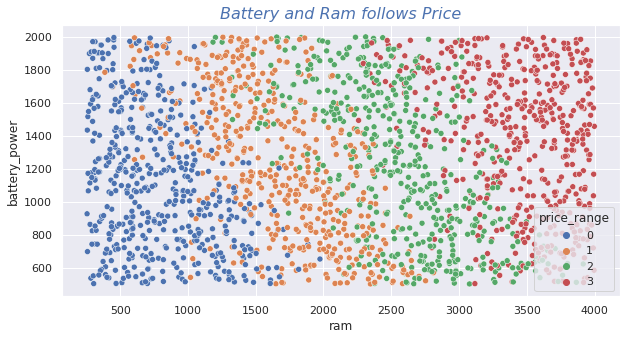

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(data= train, x= 'ram', y= 'battery_power', hue='price_range')
plt.title("Battery and Ram follows Price",c='b',style="oblique",size=16)

In [ ]:
rb_train = train[['battery_power','ram','price_range']]
rb_test = test[['battery_power','ram']]


In [ ]:
#Train valid split
X_train, X_test, y_train, y_test = train_test_split(rb_train.iloc[:,0:-1],
                                                    rb_train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])


In [ ]:

grid1 = GridSearchCV(pipe, parameters, cv= 2, scoring='accuracy',verbose=1)

#Fit
grid1.fit(X_train, y_train)

y_pred = grid1.predict(X_test)

print("-"*80)
print("C·∫•u h√¨nh t·ªët nh·∫•t: ", grid.best_params_)
print("ƒê·ªô ch√≠nh x√°c: {:6.2f}".format(grid1.score(X_test, y_test)))

Fitting 2 folds for each of 70 candidates, totalling 140 fits
--------------------------------------------------------------------------------
C·∫•u h√¨nh t·ªët nh·∫•t:  {'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 500, 'solver': 'newton-cg'}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
ƒê·ªô ch√≠nh x√°c:   0.80


In [ ]:
# K·∫øt qu·∫£
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)
print("ƒê·ªô ch√≠nh x√°c (precision): {:7.2f}%".format(scores[0]*100))
print("ƒê·ªô tri·ªáu h·ªìi (recall): {:7.2f}%".format(scores[1]*100))
print("ƒê·ªô ƒëo F1 (F1-measure): {:7.2f}%".format(scores[2]*100))
print("ƒê·ªô ch√≠nh x√°c (accuracy): {:7.2f}%".format(accuracy*100))

ƒê·ªô ch√≠nh x√°c (precision):   79.96%
ƒê·ªô tri·ªáu h·ªìi (recall):   80.30%
ƒê·ªô ƒëo F1 (F1-measure):   80.07%
ƒê·ªô ch√≠nh x√°c (accuracy):   80.17%


In [ ]:
results['ram & battery'] = [scores[0]*100,scores[1]*100,scores[2]*100,accuracy*100]


**K·∫øt qu·∫£:** K·∫øt qu·∫£ cho th·∫•y khi ch·ªâ s·ª≠ d·ª•ng battery v√† ram cho k·∫øt qu·∫£ kh√° cao (accuracy: 80,5) tuy nhi√™n v·∫´n th·∫•p h∆°n nhi·ªÅu so v·ªõi khi s·ª≠ d·ª•ng to√†n b·ªô dataset (accuracy: 96,6%)

**C·∫•u h√¨nh t·ªët nh·∫•t:**
{'classifier__selected_model': ('lr', {'fit_intercept': True, 'max_iter': 500, 'solver': 'newton-cg'}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}

**ƒê·ªô ch√≠nh x√°c:   0.80**

### 2.2 Using only px_width & ram

In [ ]:
pr_train = train[['px_width','ram','price_range']]
pr_test = test[['px_width','ram']]

#Train valid split
X_train, X_test, y_train, y_test = train_test_split(pr_train.iloc[:,0:-1], 
                                                    rb_train.iloc[:,-1],
                                                    random_state=params["random_state"],
                                                    train_size=params['data_split_train'])

grid2 = GridSearchCV(pipe, parameters, cv=params['k_fold'], scoring='accuracy',verbose=1)

#Fit
grid2.fit(X_train, y_train)
y_pred = grid2.predict(X_test)
print("-"*80)
print("C·∫•u h√¨nh t·ªët nh·∫•t: ", grid2.best_params_)
print("ƒê·ªô ch√≠nh x√°c: {:6.2f}".format(grid2.score(X_test, y_test)))

Fitting 3 folds for each of 70 candidates, totalling 210 fits
--------------------------------------------------------------------------------
C·∫•u h√¨nh t·ªët nh·∫•t:  {'classifier__selected_model': ('svm', {}), 'scaler__selected_model': ('std', {'with_mean': True, 'with_std': False})}
ƒê·ªô ch√≠nh x√°c:   0.74


In [ ]:
# K·∫øt qu·∫£
scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred, normalize=True)
print("ƒê·ªô ch√≠nh x√°c (precision): {:7.2f}%".format(scores[0]*100))
print("ƒê·ªô tri·ªáu h·ªìi (recall): {:7.2f}%".format(scores[1]*100))
print("ƒê·ªô ƒëo F1 (F1-measure): {:7.2f}%".format(scores[2]*100))
print("ƒê·ªô ch√≠nh x√°c (accuracy): {:7.2f}%".format(accuracy*100))

ƒê·ªô ch√≠nh x√°c (precision):   74.37%
ƒê·ªô tri·ªáu h·ªìi (recall):   74.63%
ƒê·ªô ƒëo F1 (F1-measure):   74.45%
ƒê·ªô ch√≠nh x√°c (accuracy):   74.50%


In [ ]:
results['ram & px_width'] = [scores[0]*100,scores[1]*100,scores[2]*100,accuracy*100]


**Nh·∫≠n x√©t:** Khi ch·ªâ s·ª≠ d·ª•ng c·ªôt px_width v√† ram ch·ªâ cho ra k·∫øt qu·∫£ t∆∞∆°ng ƒë·ªëi (accuracy 75,3%)

## 2.3 Results


In [ ]:
df_results = pd.DataFrame.from_dict(results)
df_results['index'] =  ['precision','recall','f1-score','accuracy']
df_results
df_results.set_index('index')


all  ram & battery  ram & px_width
index                                              
precision  96.680538      79.960548       74.372942
recall     96.704343      80.301413       74.628205
f1-score   96.686982      80.068385       74.450471
accuracy   96.666667      80.166667       74.500000

**Nh·∫≠n x√©t:** 
- Khi ch·ªâ s·ª≠ d·ª•ng 2 feature ram v√† (battery or px_width) cho ta k·∫øt qu·∫£ th·∫•p h∆°n khi d√πng to√†n b·ªô d·ªØ li·ªáu
- Tuy nhi√™n k·∫øt qu·∫£ khi ch·ªâ s·ª≠ d·ª•ng ram & battery cho ra k·∫øt qu·∫£ r·∫•t ti·ªÅm nƒÉng (accuracy: 81,5%)

**Ph∆∞∆°ng ph√°p:** C√≥ th·ªÉ k·∫øt h·ª£p ram & battery c√πng m·ªôt s·ªë ƒë·∫∑c tr∆∞ng c√≥ ƒë·ªô t∆∞∆°ng qua v·ªõi outcome l·ªõn (px_height, px_with, int_memory) s·∫Ω cho ra k·∫øt qu·∫£ t·ªët h∆°n

## 2.4 Plot boudary

In [ ]:
!pip install mlxtend  

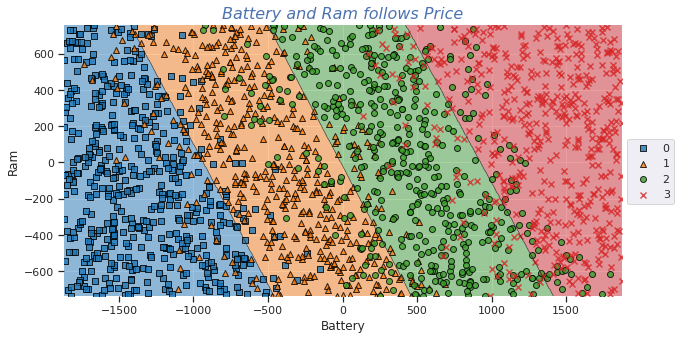

In [ ]:
from mlxtend.plotting import plot_decision_regions


X = rb_train[['ram','battery_power']]
y = np.array(rb_train['price_range'])



scaler = StandardScaler(with_mean = True, with_std= False)
X = scaler.fit_transform(X)

# Training a classifier
clf = LogisticRegression(fit_intercept= True, max_iter= 500, solver= 'newton-cg')
clf.fit(X, y)


# Plotting decision regions
sns.set()
plt.figure(figsize=(10,5))

plot_decision_regions(X, y, clf=clf)

# Adding axes annotations
plt.title("Battery and Ram follows Price",c='b',style="oblique",size=16)
plt.xlabel('Battery')
plt.ylabel('Ram')

plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

**Nh·∫≠n x√©t:** Khi k·∫øt h·ª£p ƒë·∫∑c tr∆∞ng Ram v√† Battery ta c√≥ th·ªÉ th·∫•y ƒë·ªô ph√¢n t√°ch c·ªßa class kh√° t·ªët  ƒë·∫∑c bi·ªát l√† l·ªõp 0 v√† 3

#Summary ü¶ñ
- Lab1: T√¨m hi·ªÉu v√† hi·ªÉn th·ªã data
  - Dataset v·ªÅ th√¥ng s·ªë c·ªßa ƒëi·ªán tho·∫°i d√πng ƒë·ªÉ ph√¢n l·ªõp m·ª©c gi√°
  - G·ªìm 2000 m·∫´u v√† 19 ƒë·∫∑c tr∆∞ng (non-null)
  - C√°c ƒë·∫∑c tr∆∞ng c√≥ t∆∞∆°ng quan l·ªõn v·ªõi class (ram, battery, px_width)
  - D√πng GridSearch t√¨m m√¥ h√¨nh v√† params t·ªëi ∆∞u
  ==> Th·ª≠ nghi·ªám: ch·ªâ s·ª≠ d·ª•ng m·ªôt s·ªë ƒë·∫∑c tr∆∞ng t·ªët ti·∫øn h√†nh ph√¢n l·ªõp.
    
    ---> K·∫øt qu·∫£: K·∫øt qu·∫£ kh√¥ng t·ªët b·∫±ng khi s·ª≠ d·ª•ng to√†n b·ªô dataset

---------------------------------------------
